In [1]:
import sys
sys.path.append("../core/simulations")
import simulations
import numpy as np
import matplotlib.pyplot as plt
import visuals

plt.style.use("ggplot")

# Muller-Brown Potential

In [2]:
mw_sim_1 = simulations.MuellerWellSim("configs/muller_well_config_1.yml")
mw_sim_1.runSimulation()
mw_sim_2 = simulations.MuellerWellSim("configs/muller_well_config_2.yml")
mw_sim_2.runSimulation()

In [3]:
a = np.array(mw_sim_1.coordinate_logger.coordinates)
b = np.array(mw_sim_2.coordinate_logger.coordinates)

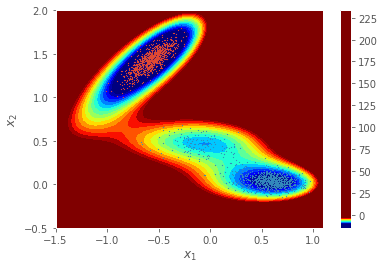

In [4]:
visuals.plot_2D_potential(mw_sim_1.central_potential, xlim = [-1.5, 1.1], ylim = [-0.5, 2], cmap = "jet")
plt.scatter(*a.T, s=0.5)
plt.scatter(*b.T, s=0.5)

# Double well Potential

In [5]:
dw_sim_1 = simulations.DoubleWellSim("configs/double_well_config_1.yml")
dw_sim_1.runSimulation()
dw_sim_2 = simulations.DoubleWellSim("configs/double_well_config_2.yml")
dw_sim_2.runSimulation()

In [6]:
a = np.array(dw_sim_1.coordinate_logger.coordinates)
b = np.array(dw_sim_2.coordinate_logger.coordinates)

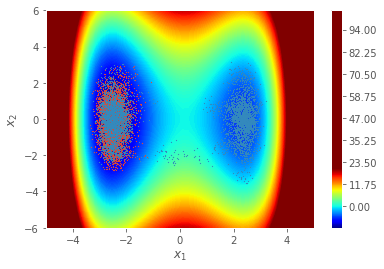

In [7]:
visuals.plot_2D_potential(dw_sim_1.central_potential, xlim = [-5, 5], ylim = [-6, 6], cmap = "jet", min = None, max = 20)
plt.scatter(*a.T, s=0.5)
plt.scatter(*b.T, s=0.5)

# Dimer Simulation (MD)

In [8]:
dimer_sim = simulations.DimerLJFluidSim("configs/dimer_sim_config_md.yml")
dimer_sim.runSimulation()

In [9]:
a = np.array(dimer_sim.coordinate_logger.coordinates)

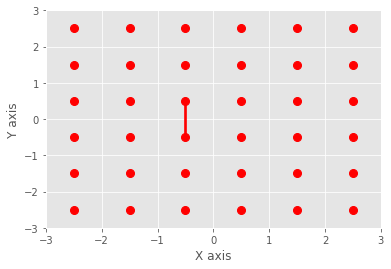

In [10]:
visuals.make_2D_traj_bond(a, dimer_sim.system.box, [[14, 15]])

(array([ 2.,  3.,  5.,  3., 12., 15., 18., 10., 25., 25., 31., 19., 25.,
        23., 26., 16., 13., 13.,  8., 14., 10., 22., 14.,  9., 16., 17.,
        14., 13.,  5., 14., 12.,  9., 12.,  8.,  4.,  3.,  4.,  2.,  2.,
         5.]),
 array([2.99729364, 3.05047271, 3.10365177, 3.15683083, 3.2100099 ,
        3.26318896, 3.31636803, 3.36954709, 3.42272616, 3.47590522,
        3.52908429, 3.58226335, 3.63544242, 3.68862148, 3.74180055,
        3.79497961, 3.84815868, 3.90133774, 3.95451681, 4.00769587,
        4.06087494, 4.114054  , 4.16723307, 4.22041213, 4.27359119,
        4.32677026, 4.37994932, 4.43312839, 4.48630745, 4.53948652,
        4.59266558, 4.64584465, 4.69902371, 4.75220278, 4.80538184,
        4.85856091, 4.91173997, 4.96491904, 5.0180981 , 5.07127717,
        5.12445623]),
 <a list of 40 Patch objects>)

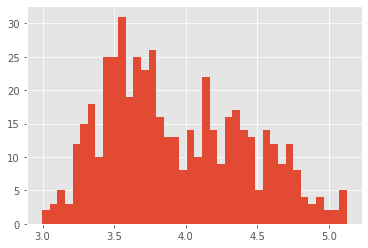

In [11]:
plt.hist(np.array(dimer_sim.dist_logger.d), bins = 40)

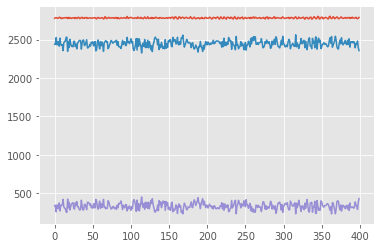

In [12]:
plt.plot(dimer_sim.energy_logger.H[-400:])
plt.plot(dimer_sim.energy_logger.U[-400:])
plt.plot(dimer_sim.energy_logger.K[-400:])


# Dimer Simulation (MC)

In [13]:
dimer_sim = simulations.DimerLJFluidSim("configs/dimer_sim_config_mc.yml")
dimer_sim.runSimulation()

In [14]:
a = np.array(dimer_sim.coordinate_logger.coordinates)

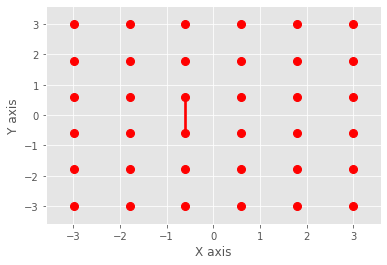

In [15]:
visuals.make_2D_traj_bond(a, dimer_sim.system.box, [[14, 15]])

(array([  5.,  26.,  56.,  92., 115.,  85.,  57.,  32.,  13.,   1.,   2.,
          1.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   2.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   4.]),
 array([5.06179136, 5.08800384, 5.11421633, 5.14042882, 5.1666413 ,
        5.19285379, 5.21906628, 5.24527876, 5.27149125, 5.29770373,
        5.32391622, 5.35012871, 5.37634119, 5.40255368, 5.42876616,
        5.45497865, 5.48119114, 5.50740362, 5.53361611, 5.55982859,
        5.58604108, 5.61225357, 5.63846605, 5.66467854, 5.69089103,
        5.71710351, 5.743316  , 5.76952848, 5.79574097, 5.82195346,
        5.84816594, 5.87437843, 5.90059091, 5.9268034 , 5.95301589,
        5.97922837, 6.00544086, 6.03165334, 6.05786583, 6.08407832,
        6.1102908 ]),
 <a list of 40 Patch objects>)

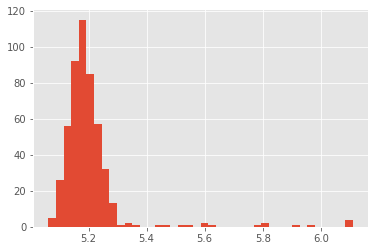

In [16]:
plt.hist(np.array(dimer_sim.dist_logger.d), bins = 40)

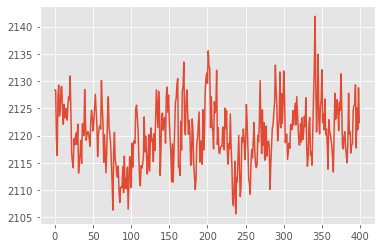

In [17]:
plt.plot(dimer_sim.energy_logger.H[-400:])

In [18]:
dimer_sim.system.integrator.thermostat